# _EMC²_ Demo Notebook

In this notebook we show an example of how to run $EMC^2$ using ModelE3 climate model output and high spectral resolution lidar (HSRL) data, and demonstrate some of the framework's plotting capabilities.

In [1]:
import emc2
import matplotlib.dates as mdates

First, we load model data (in this case, ModelE3) using the ModelE subclass object

In [2]:
model_path = 'allsteps.allmergeSCM_AWARE_788.nc'
my_model = emc2.core.model.ModelE(model_path)

After that, we load in the HSRL data using the HSRL subclass object.

In [3]:
HSRL = emc2.core.instruments.HSRL('nsa')
HSRL.read_arm_netcdf_file('awrhsrlM1.20160816.100000.nc')  # raw or processed ARM or ARM-like data file

In [4]:
HSRL.ds

<xarray.Dataset>
Dimensions:                                (altitude: 334, mean_time: 120, profile_time: 1, time: 120)
Coordinates:
  * time                                   (time) datetime64[ns] 2016-08-16T10:00:00 ... 2016-08-16T10:59:30
  * mean_time                              (mean_time) object 2016-08-16 10:00:00 ... 2016-08-16 10:59:30
  * altitude                               (altitude) float32 0.0 ... 9990.0
Dimensions without coordinates: profile_time
Data variables:
    base_time                              object ...
    first_time                             object ...
    last_time                              object ...
    latitude                               (time) float32 dask.array<chunksize=(120,), meta=np.ndarray>
    longitude                              (time) float32 dask.array<chunksize=(120,), meta=np.ndarray>
    od                                     (time, altitude) float32 dask.array<chunksize=(120, 334), meta=np.ndarray>
    profile_od                             (profile_time, altitude) float32 dask.array<chunksize=(1, 334), meta=np.ndarray>
    od_aerosol                             (time, altitude) float32 dask.array<chunksize=(120, 334), meta=np.ndarray>
    profile_od_aerosol                     (profile_time, altitude) float32 dask.array<chunksize=(1, 334), meta=np.ndarray>
    profile_extinction                     (profile_time, altitude) float32 dask.array<chunksize=(1, 334), meta=np.ndarray>
    extinction                             (time, altitude) float32 dask.array<chunksize=(120, 334), meta=np.ndarray>
    profile_extinction_aerosol             (profile_time, altitude) float32 dask.array<chunksize=(1, 334), meta=np.ndarray>
    extinction_aerosol                     (time, altitude) float32 dask.array<chunksize=(120, 334), meta=np.ndarray>
    beta_a                                 (time, altitude) float32 dask.array<chunksize=(120, 334), meta=np.ndarray>
    atten_beta_a_backscat                  (time, altitude) float32 dask.array<chunksize=(120, 334), meta=np.ndarray>
    circular_depol                         (time, altitude) float32 dask.array<chunksize=(120, 334), meta=np.ndarray>
    linear_depol                           (time, altitude) float32 dask.array<chunksize=(120, 334), meta=np.ndarray>
    profile_circular_depol                 (profile_time, altitude) float32 dask.array<chunksize=(1, 334), meta=np.ndarray>
    profile_linear_depol                   (profile_time, altitude) float32 dask.array<chunksize=(1, 334), meta=np.ndarray>
    beta_a_backscat_parallel               (time, altitude) float32 dask.array<chunksize=(120, 334), meta=np.ndarray>
    profile_beta_a_backscat_parallel       (profile_time, altitude) float32 dask.array<chunksize=(1, 334), meta=np.ndarray>
    beta_a_backscat_perpendicular          (time, altitude) float32 dask.array<chunksize=(120, 334), meta=np.ndarray>
    profile_beta_a_backscat_perpendicular  (profile_time, altitude) float32 dask.array<chunksize=(1, 334), meta=np.ndarray>
    beta_a_backscat                        (time, altitude) float32 dask.array<chunksize=(120, 334), meta=np.ndarray>
    profile_beta_a_backscat                (profile_time, altitude) float32 dask.array<chunksize=(1, 334), meta=np.ndarray>
    qc_mask                                (time, altitude) float64 dask.array<chunksize=(120, 334), meta=np.ndarray>
Attributes:
    dpl_py_template:                                                         ...
    dpl_py_template_version:                                                 ...
    time_zone:                                                               ...
    codeversion:                                                             ...
    codedate:                                                                ...
    hsrl_instrument:                                                         ...
    hsrl_altitude_m:                                                         ...
    hsrl_latitude_degN:          

The following command will generate and process 8 subcolumns per time period of simulated HSRL data using the default radiation approach and classify the simulator output.

In [5]:
my_model = emc2.simulator.main.make_simulated_data(my_model, HSRL, 8, do_classify=True, convert_zeros_to_nan=True)

## Creating subcolumns...
Fully overcast cl & ci in 276 voxels
Fully overcast pl & pi in 385 voxels
Fully overcast pl & pi in 0 voxels
Generating lidar moments...
Generating stratiform lidar variables using radiation logic
Done! total processing time = 1.27s
Generating convective lidar variables using radiation logic
Done! total processing time = 1.49s


In [6]:
my_model.ds

<xarray.Dataset>
Dimensions:                     (p: 110, subcolumn: 8, time: 48)
Coordinates:
  * p                           (p) float64 979.0 969.0 959.0 ... 0.0075 0.0035
  * subcolumn                   (subcolumn) int64 0 1 2 3 4 5 6 7
  * time                        (time) datetime64[ns] 2016-08-16T01:15:00 ... 2016-08-17T00:45:00
    lon                         float32 166.72
    lat                         float32 -77.85
Data variables:
    axyp                        float32 dask.array<chunksize=(), meta=np.ndarray>
    prsurf                      (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    gtempr                      (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    shflx                       (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    lhflx                       (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    ustar                       (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    pblht                       (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    pwv                         (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    pblht_bp                    (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    u                           (time, p) float32 0.0 ... 0.10967822
    v                           (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    t                           (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    th                          (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    q                           (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    rhw                         (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    z                           (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    p_3d                        (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    olr                         (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    olrcs                       (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    lwds                        (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    lwdscs                      (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    lwus                        (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    swds                        (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    swus                        (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    swnscs                      (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    swdf                        (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    lwdp                        (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    swdp                        (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    dth_sw                      (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    dth_lw                      (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    dth_rad                     (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    lwup                        (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    swup                        (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    dq_turb                     (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    dth_turb                    (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    e_turb                      (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    km_turb                     (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    kh_turb                     (time, p) float32 dask

$EMC^2$ can interacts with the [Atmospheric Community Toolkit](https://arm-doe.github.io/ACT) allowing to easily create visualizations. Alternatively, as in the observed and simulated examples below, one can use $EMC^2$'s SubcolumnDisplay subclass object (of ACT's Display class) to generate and save visualizations of both the observation and simulated variables.
The SubcolumnDisplay plotting routins enable mask arrays to be applied on instrument variables; in this case, observed data is masked where the particulate optical thickness is greater than 4, providing a "cleaner" plots.

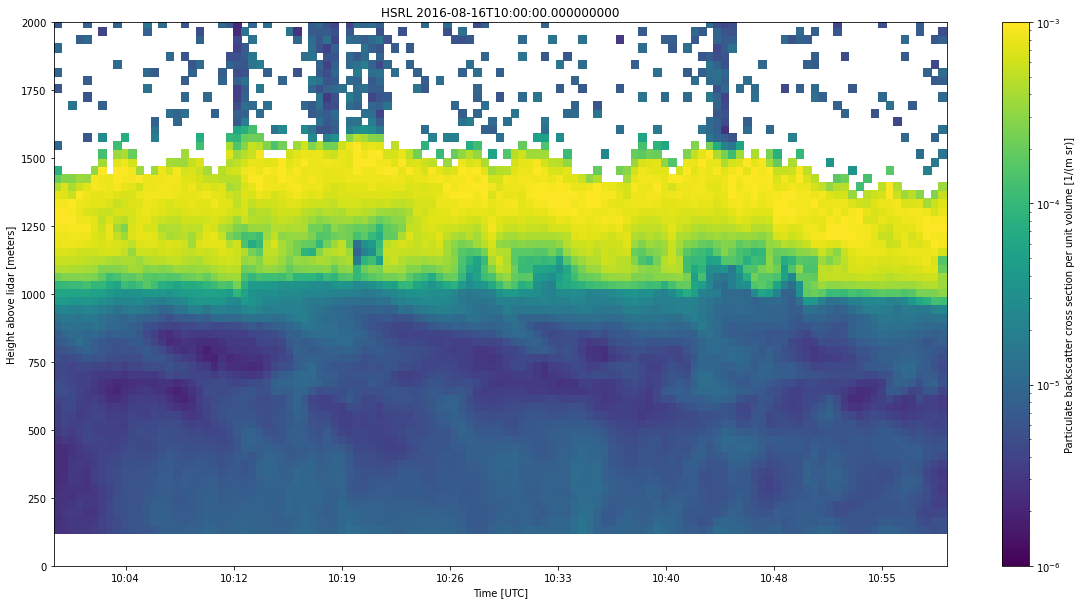

In [7]:
display = emc2.plotting.SubcolumnDisplay(my_model, figsize=(20, 10))
ax, _ = display.plot_instrument_timeseries(HSRL, "beta_a_backscat", log_plot=True, y_range=(0., 2000.),
                                           cmap="viridis", vmin=1e-6, vmax=1e-3,
                                           Mask_array=HSRL.ds["od_aerosol"] > 4.)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
display.fig.savefig('HSRL_backscatter.png', dpi=200)

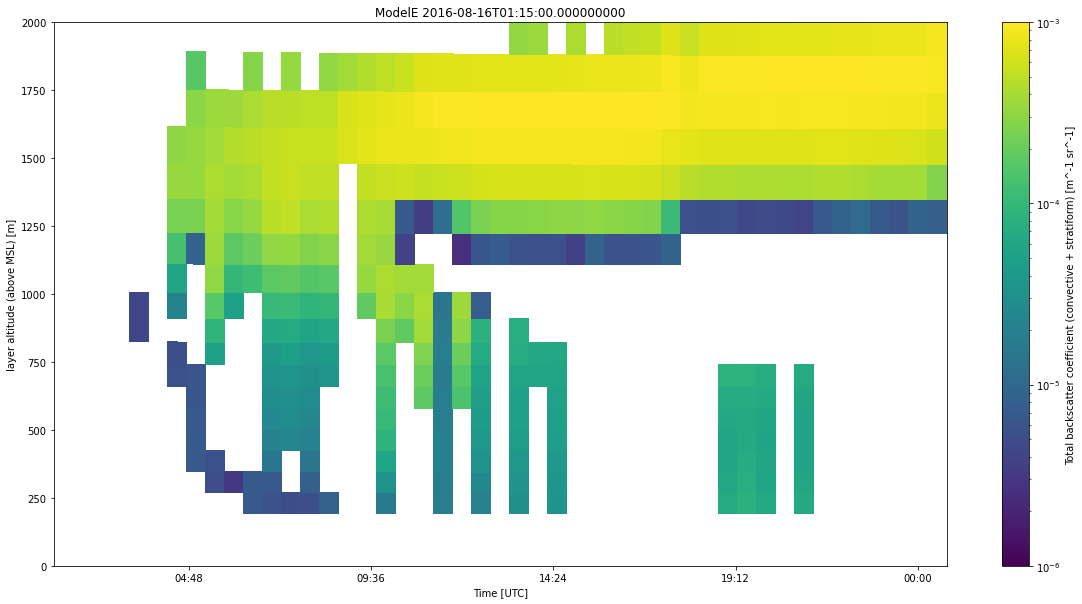

In [8]:
model_display = emc2.plotting.SubcolumnDisplay(my_model, figsize=(20, 10))
ax_mod, _ = model_display.plot_subcolumn_timeseries("sub_col_beta_p_tot", 0, log_plot=True, y_range=(0., 2000.),
                                                 pressure_coords=False, cmap="viridis", vmin=1e-6, vmax=1e-3)
ax_mod.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
display.fig.savefig('HSRL_backscatter_simulated.png', dpi=200)

We can also use $EMC^2$'s SubcolumnDisplay object to generate profile plots with shaded regions designating variable temporal or spatial (based on all subcolumns) standard deviation.

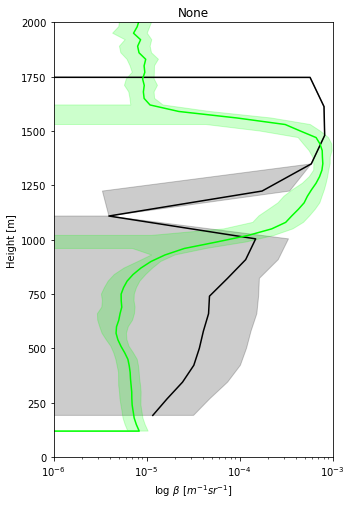

In [9]:
model_display_prof = emc2.plotting.SubcolumnDisplay(my_model, figsize=(5,8))
axp = model_display_prof.plot_subcolumn_mean_profile("sub_col_beta_p_tot", "2016-08-16T10:00:00", log_plot=True,
                                                     y_range=(0., 2000.), x_range=(1e-6, 1e-3), color='black',
                                                     pressure_coords=False, alpha=0.2)
axp = model_display_prof.plot_instrument_mean_profile(HSRL, "beta_a_backscat", log_plot=True,
                                                     Mask_array=HSRL.ds["od_aerosol"] > 4.,
                                                     y_range=(0., 2000.), x_range=(1e-6, 1e-3), color="lime",
                                                     pressure_coords=False, alpha=0.2)
display.fig.savefig('HSRL_backscatter_simulated_profile.png', dpi=200)

Finally, $EMC^2$'s SubcolumnDisplay object also allows easy production of phase classification plots. Here we demonstrate curtain plots of lidar classificaiton for the first subcolumn and frequency phase ratio calculated using all subcolumn data.  

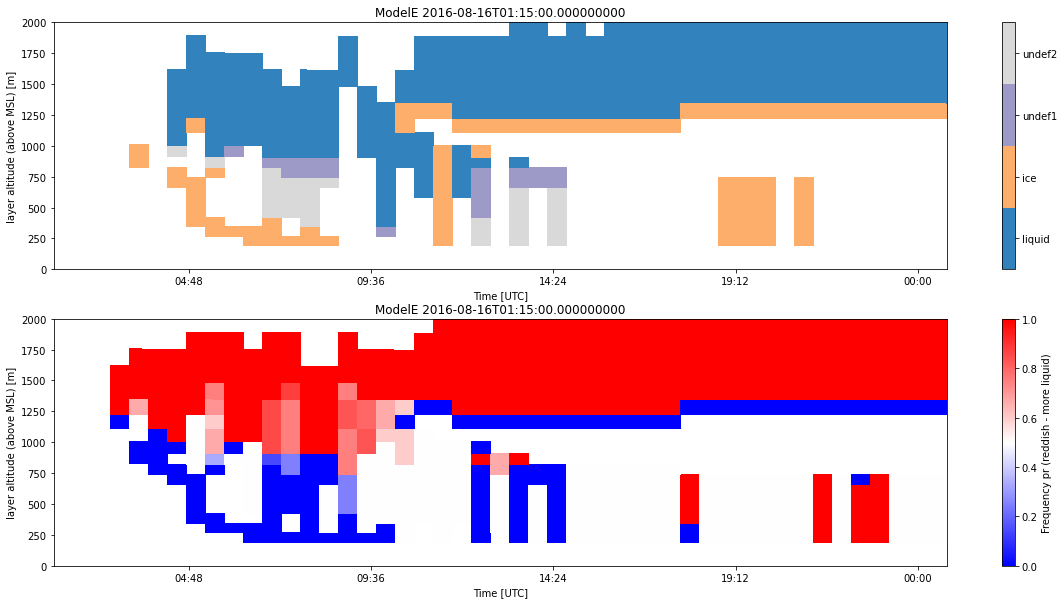

In [10]:
model_display2 = emc2.plotting.SubcolumnDisplay(my_model, figsize=(20,10), subplot_shape=(2, 1))
ax2_1, cb2_1 = model_display2.plot_subcolumn_timeseries("phase_mask_HSRL_all_hyd", 0, y_range=(0., 2000.),
                                                 pressure_coords=False, subplot_index=0)
model_display.change_plot_to_class_mask(cb2_1, variable="phase_mask_HSRL_all_hyd", convert_zeros_to_nan=True)
ax2_1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

my_model = emc2.simulator.classification.calculate_phase_ratio(my_model, "phase_mask_HSRL_all_hyd", [1])
ax2_2, cb2_2 = model_display2.plot_subcolumn_timeseries("phase_mask_HSRL_all_hyd_fpr", 0, y_range=(0., 2000.),
                                                    pressure_coords=False, cmap="bwr", subplot_index=1,
                                                    cbar_label='Frequency pr (reddish - more liquid)')
ax2_2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
display.fig.savefig('HSRL_backscatter_simulated_class.png', dpi=200)